### Training a nearest neighbors classifier breakout
##### Code provided by Todd Holloway, modified by Jason Anastasopoulos

Load the relevant packages.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston

Let's load the Boston housing data to train a nearest neighbors classifier to identify "expensive" v. "cheap" neighborhoods using the "MEDV" variable, which is the mean housing price. Here are the other feature labels and names: 

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - \% lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [2]:
boston = load_boston()

#print "Keys", boston.keys()

# It might also be useful to see what our other feature names are 
print "Feature names", boston['feature_names']

Feature names ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# In this data 'data' are the features and 'target' is the median home value
features = boston['data']

medianhome = boston['target'] # Outcome

# Let's see the distribution of the median home value per neighborhood
#plt.hist(medianhome)

# Divide 'medianhome' by high and low cost housing
median = np.median(medianhome)

# Create a recoded 'medianhome' variable
medianclass = np.where(medianhome > median, 1, 0) # 1 = Exepensive neighborhood; # 0 = Cheap neighborhood

medianclass
#plt.hist(medianclass)

#print "Recoded medianhome variable", medianclass

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1,

Let's train a classifier that can distinguish between high and low income neighborhoods w/ our new variables

In [4]:
# What are the dimensions of the data? 
print 'Feature matrix',  np.shape(features)

print 'Class label' , len(medianclass)

Feature matrix (506L, 13L)
Class label 506


In [5]:
# Prep the data for training
X, Y = features, medianclass

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]


# Split into train and test.
train_data, train_labels = X[:400], Y[:400]

test_data, test_labels = X[400:], Y[400:]

Create a distance function that returns the distance between 2 observations. Let's do Euclidean distance

\begin{equation*}
 \sqrt(\sum((x - y)^2))
\end{equation*}


In [6]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

Just for fun, let's compute all the pairwise distances in the training data and plot a histogram.

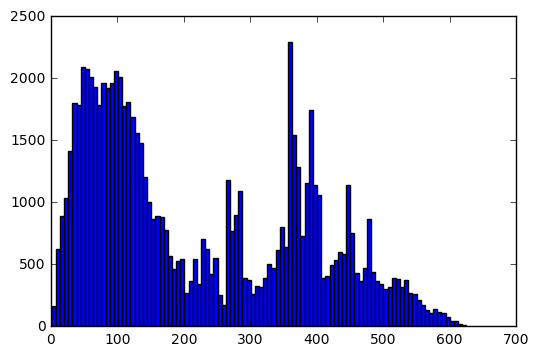

In [7]:
dists = []
for i in range(len(train_data) - 1):
    for j in range(i + 1, len(train_data)):
        dist = EuclideanDistance(train_data[i], train_data[j])
        dists.append(dist)
        
fig = plt.hist(dists, 100)

Ok now let's create a class that implements a Nearest Neighbors classifier. We'll model it after the sklearn classifier implementations, with fit() and predict() methods.

<http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>

In [8]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

Run an experiment with the classifier.

In [9]:
clf = NearestNeighbors()

clf.fit(train_data, train_labels)

preds = clf.predict(test_data)

correct, total = 0, 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1
    total += 1
print 'total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)

total: 106  correct:  95  accuracy: 0.90


In [22]:
# Let's make a confusion matrix to see how many true and false positives we have
from sklearn.metrics import confusion_matrix

true = test_labels
predicted = preds

confusion_matrix(true, predicted)

array([[48,  5],
       [ 6, 47]])

We can also get fancy and plot a normalized confusion matrix

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.11  0.89]]


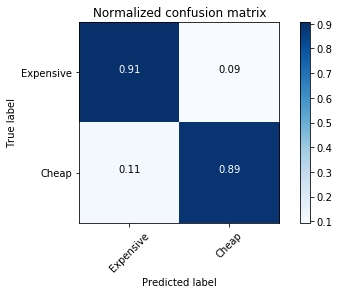

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(true, predicted)
np.set_printoptions(precision=2)

class_names = ["Expensive", "Cheap"]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')





# Breakout exercise: train a KNN classifier with sklearn

Goal here is to use the KNeighborsClassifier function to (see documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

to train a knn classifier with k = 3, 4 and 5. Use "train_data" and "train_labels" as your labels and "test_data" as the test data. 

1. Train a KNN classifier w/k = 3,4 and 5.
2. Report accuracy, precision and recall.
3. Comment on the statistics that you calculated.

In [10]:
from sklearn.neighbors import KNeighborsClassifier